<a href="https://colab.research.google.com/github/DS3001/group19/blob/main/project_2/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cleansing

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsRegressor as kNNRegression

# reading in data
df_test = pd.read_csv('https://raw.githubusercontent.com/aniishap/group-19/main/project_2/data/testing_data.csv')
df_train = pd.read_csv('https://raw.githubusercontent.com/aniishap/group-19/main/project_2/data/training_data.csv')

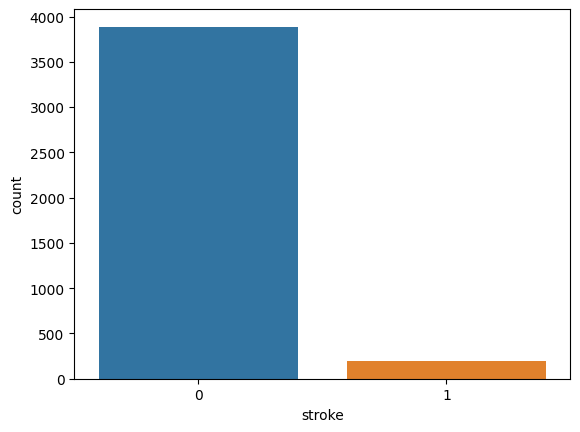

0    3888
1     199
Name: stroke, dtype: int64


In [ ]:
sns.countplot(x='stroke', data=df_train)
plt.show()
stroke_counts = df_train['stroke'].value_counts()
print(stroke_counts)

# Demonstrating the total count of 'stroke' incidences in the training data

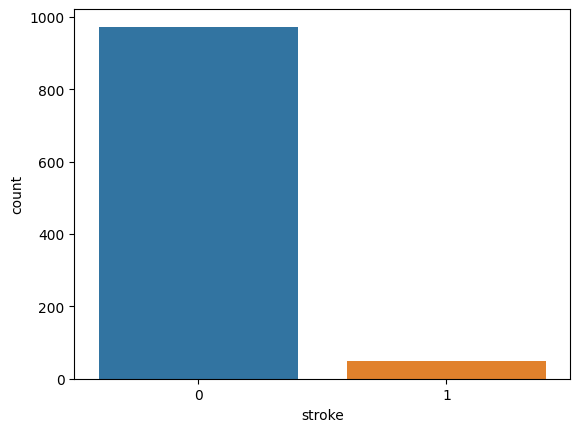

0    973
1     50
Name: stroke, dtype: int64


In [ ]:
sns.countplot(x='stroke', data=df_test)
plt.show()
stroke_counts2 = df_test['stroke'].value_counts()
print(stroke_counts2)

# Demonstrating the total count of 'stroke' incidences in the testing data

In [2]:
# training data has 1 "other" gender observation, test has none. Using ML
# methods became difficult because training and test did not match.
# so we dropped the "other" observation
df_train = df_train[df_train['gender'] != 'Other'].reset_index(drop=True)

In [ ]:
df_train.isnull().sum() #  bmi column has a total of 159 missing values

Unnamed: 0             0
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  159
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df_test.isnull().sum() #  bmi column has a total of 42 missing values


Unnamed: 0            0
id                    0
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  42
smoking_status        0
stroke                0
dtype: int64

In [3]:
# I am going to impute the averages of the 'bmi' column instead of dropping those rows to maintain sample size and avoid bias within the dataset
#for purposes of checking code later, here are the current means for eqch bmi column
avg_train = df_train['bmi'].mean()
avg_test = df_test['bmi'].mean()
print(avg_train)
print(avg_test)

df_train['bmi'] = df_train['bmi'].fillna(df_train['bmi'].mean())

df_test['bmi'] = df_test['bmi'].fillna(df_test['bmi'].mean())

print(df_test['bmi'], '\n')

#now check for missing values:
print(df_test['bmi'].isnull().sum())
print(df_train['bmi'].isnull().sum())
# There are no NAs present, sweet

#The code below is to simply make sure that the means were actually filling the missing data. We are doing this by checking the number of occurances of the means we saved above.
value_counts = df_train['bmi'].value_counts()
count_specific_number = value_counts.get(avg_train, 0)
print(count_specific_number)
#yep, 159 checks out. Sweet!

#Now, same thing for the test set
value_counts2 = df_test['bmi'].value_counts()
count_specific_number2 = value_counts2.get(avg_test, 0)
print(count_specific_number2)
#Yes, this also matches the number of na's we had before. awesome, we are all set to go forward.

28.925031830914186
28.77257900101937
0       39.200000
1       17.600000
2       35.900000
3       50.100000
4       54.600000
          ...    
1018    28.772579
1019    34.400000
1020    31.700000
1021    29.300000
1022    28.772579
Name: bmi, Length: 1023, dtype: float64 

0
0
159
42


In [ ]:
df_train.isnull().sum() # No more NA values in training set. Yay!

Unnamed: 0           0
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df_test.isnull().sum() # No more NA values in test set. Double Yay!

Unnamed: 0           0
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [4]:
# Drop 'Unnamed:0' and 'id' columns because they are not useful in our study
list=['Unnamed: 0', 'id']
df_train=df_train.drop(list,axis=1)
df_test=df_test.drop(list,axis=1)

In [5]:
unknown_count_train = (df_train['smoking_status'] == 'Unknown').sum()
print(unknown_count_train)
# Do we want to drop all 'Unknown' rows?
# There are only supposed to be 3 levels to this variable

1241


In [ ]:
unknown_count_test = (df_test['smoking_status'] == 'Unknown').sum()
print(unknown_count_test)

303


In [ ]:
# These are a lot of Unknown values, and it wouldn't make sense to drop all the rows.
# I think in this case, we will leave 'Unknown' as a 4th category under
# 'Smoking Status'

print(df_train)


# This is a view of our cleansed dataset

      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  36.0             0              0          Yes       Govt_job   
1     Female  45.0             0              0          Yes       Govt_job   
2       Male  58.0             0              0           No  Self-employed   
3     Female  61.0             0              0          Yes  Self-employed   
4     Female  78.0             0              0           No        Private   
...      ...   ...           ...            ...          ...            ...   
4081  Female  53.0             0              0          Yes       Govt_job   
4082    Male  76.0             1              0          Yes  Self-employed   
4083  Female  81.0             0              0          Yes        Private   
4084  Female  55.0             1              1          Yes        Private   
4085    Male  47.0             0              0          Yes        Private   

     Residence_type  avg_glucose_level   bmi   smok

<Axes: >

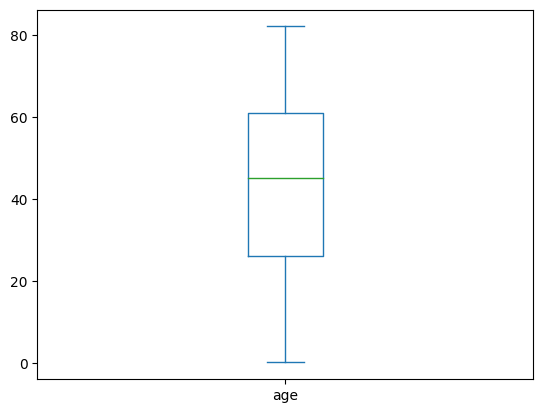

In [ ]:
# box plots to look at outliers in numerical variables
df_train['age'].plot.box()
# looks like no outliers in age variable in training set

<Axes: >

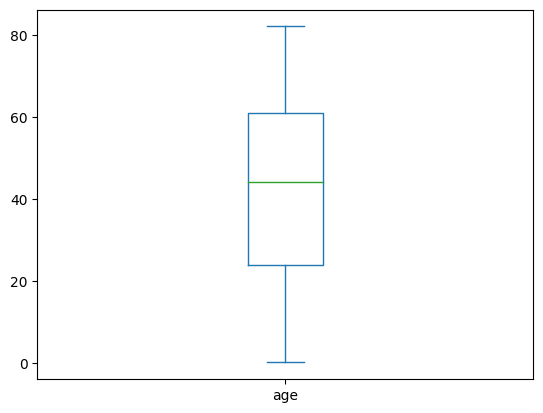

In [ ]:
# what about outliers in test set?
df_test['age'].plot.box()
# no outliers here either!

<Axes: >

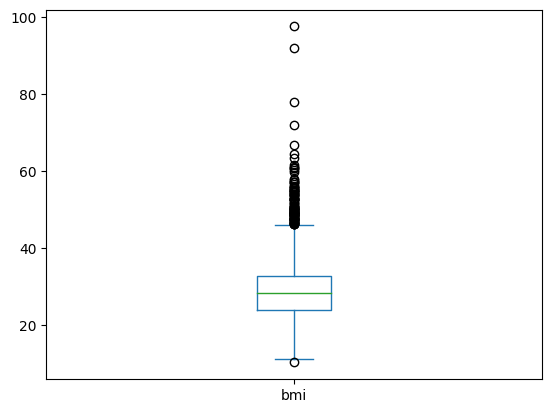

In [ ]:
# box plot to check for outliers in bmi variable in training set
df_train['bmi'].plot.box()
# wow... many outliers, we should windsorize

<Axes: >

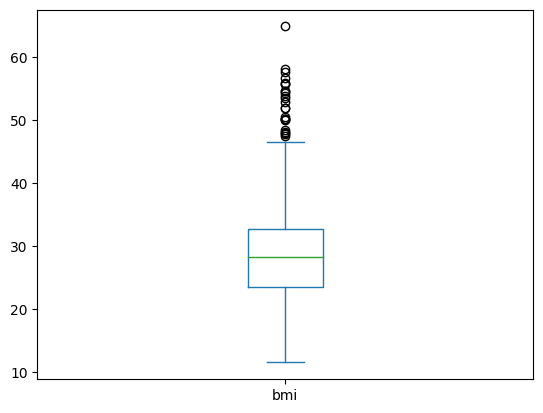

In [ ]:
# box plot to check for outliers in bmi variable in test set
df_test['bmi'].plot.box()
# lots of outliers here too!

<Axes: >

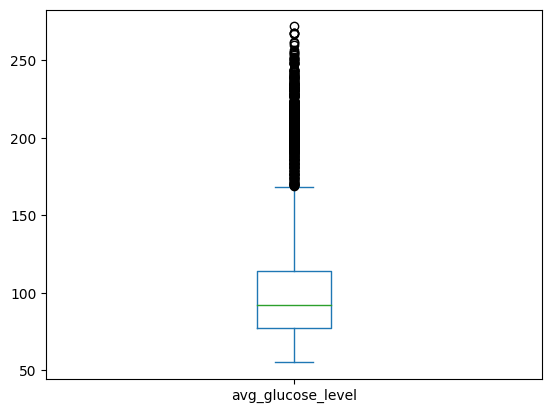

In [ ]:
# what about for average glucose level in the training set?
df_train['avg_glucose_level'].plot.box()
# many outliers

<Axes: >

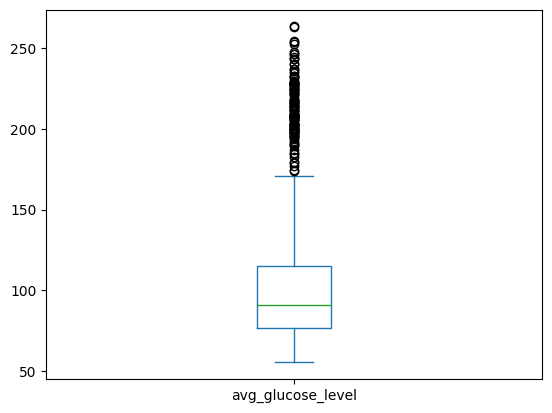

In [ ]:
# now lets check for aerage glucose level in the test set
df_test['avg_glucose_level'].plot.box()
# let's windsorize!

In [6]:
#Windsorizing to BMI and avg_glucose_level to handle of outliers in
# training set

def windsorize(x):
    pct25, pct75 = np.percentile(x, [25, 75])
    iqr = pct75 - pct25
    lower_whisker = pct25 - iqr * 1.5
    upper_whisker = pct75 + iqr * 1.5
    x_windsor = x.copy()
    x_windsor[x < lower_whisker] = lower_whisker
    x_windsor[x > upper_whisker] = upper_whisker
    return x_windsor

numeric = ["age", "bmi", "avg_glucose_level"]
for i in numeric:
  df_train[i] = windsorize(df_train[i])

In [7]:
#Windsorizing to BMI and avg_glucose_level to handle of outliers in
# test set

def windsorize(x):
    pct25, pct75 = np.percentile(x, [25, 75])
    iqr = pct75 - pct25
    lower_whisker = pct25 - iqr * 1.5
    upper_whisker = pct75 + iqr * 1.5
    x_windsor = x.copy()
    x_windsor[x < lower_whisker] = lower_whisker
    x_windsor[x > upper_whisker] = upper_whisker
    return x_windsor

numeric = ["age", "bmi", "avg_glucose_level"]
for i in numeric:
  df_test[i] = windsorize(df_test[i])



# Exploratory Data Analysis/ Visualization





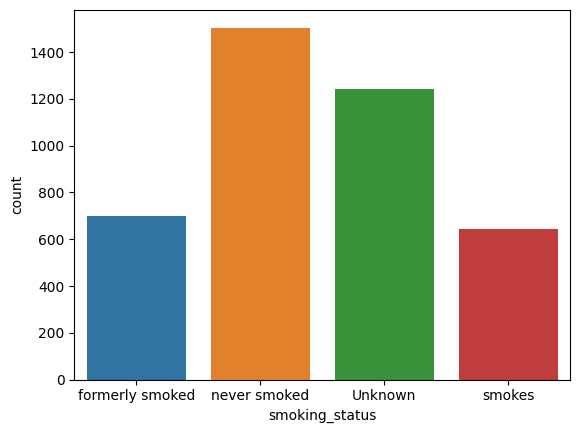

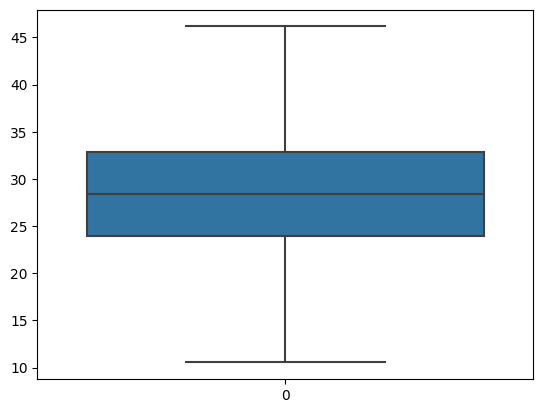

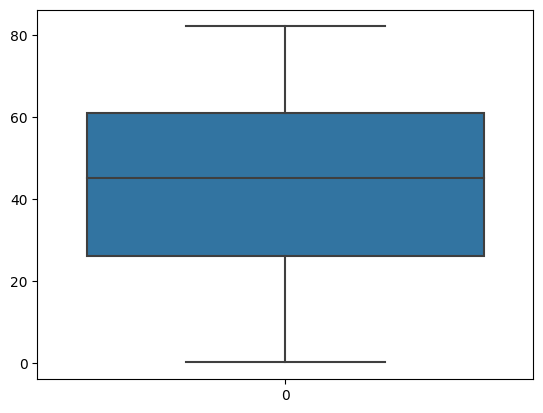

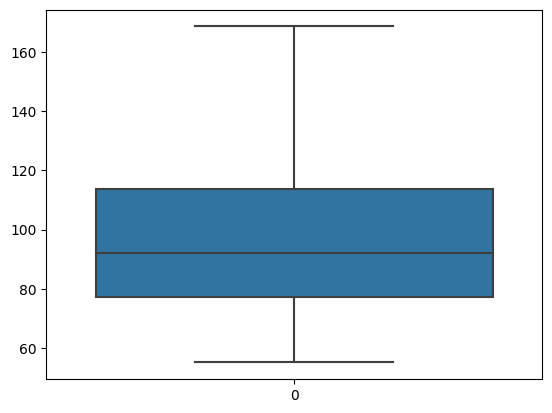

In [ ]:
# counts of smoking status
sns.countplot(x='smoking_status', data=df_train)
plt.show()

# distrbutions of numerical variables
sns.boxplot(df_train['bmi'])
plt.show()

sns.boxplot(df_train['age'])
plt.show()

sns.boxplot(df_train['avg_glucose_level'])
plt.show()

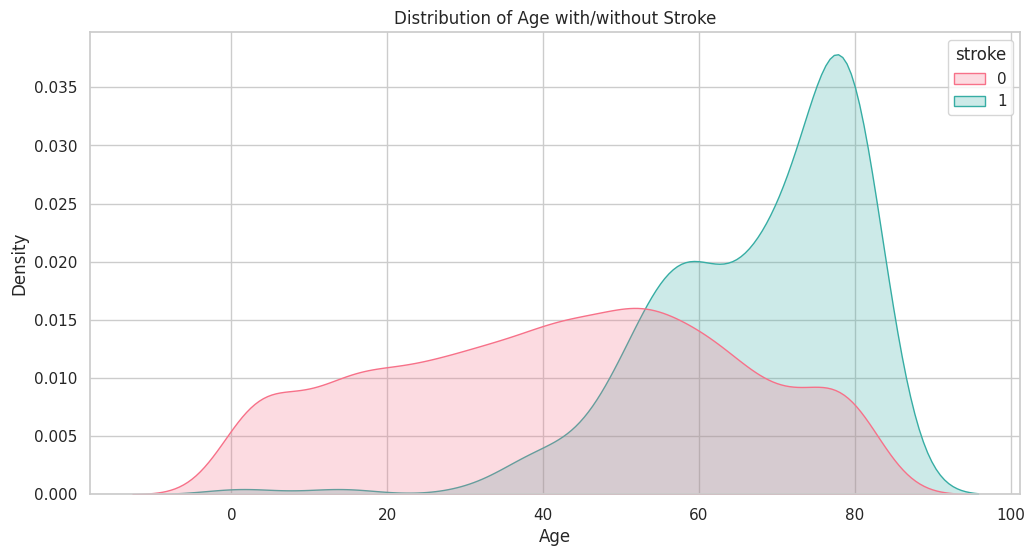

In [ ]:
# Distribution of age and stroke on training data
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.kdeplot(data=df_train, x="age", hue="stroke", fill=True, common_norm=False, palette="husl")

plt.title("Distribution of Age with/without Stroke")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

Individuals higher in age tend to have more incidents of stroke compared to no stroke. The peak age is at around 78 or 79 years of age. The likelihood of getting a stroke dramatically increases after the age of 40

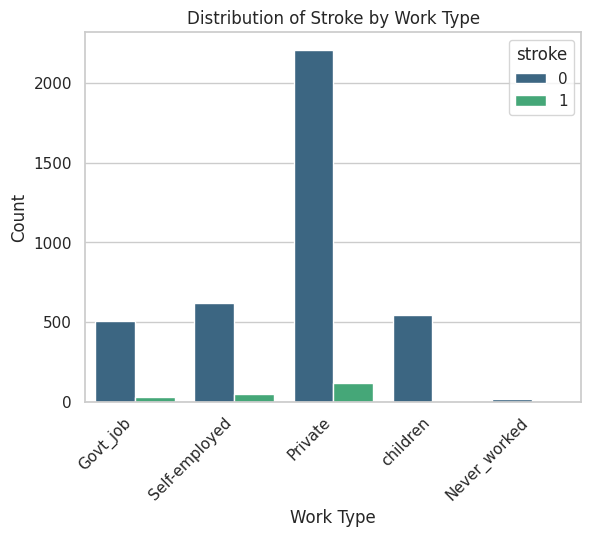

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plotting a bar plot for work_type and stroke
sns.countplot(data=df_train, x=
              "work_type", hue="stroke", palette="viridis")

plt.title("Distribution of Stroke by Work Type")
plt.xlabel("Work Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility

plt.show()

The most documented Work Type between people who have or had not a stroke are people who work in private sector employment. These employees have the most instances of strokes, while "Never_Worked" have no instances.

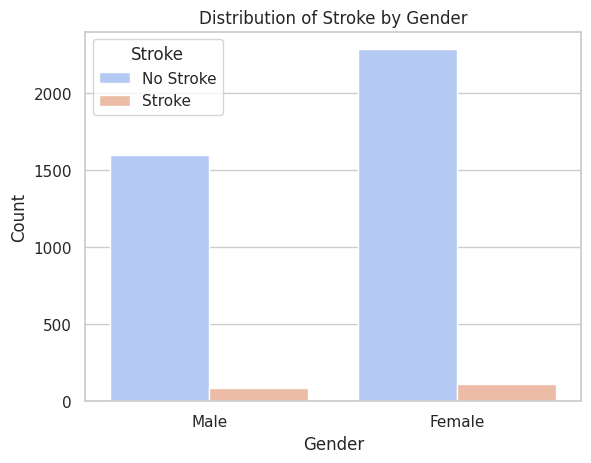

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_train, x="gender", hue="stroke", palette="coolwarm")

plt.title("Distribution of Stroke by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Stroke", labels=["No Stroke", "Stroke"])

plt.show()

In this dataset, females tend to have more strokes than men, but the difference is very minimal, and may not pose significant in understanding the relationship between gender and stroke.

<ipython-input-55-36f25534237a>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_stroke = df_train.corr()['stroke'].sort_values(ascending=False)


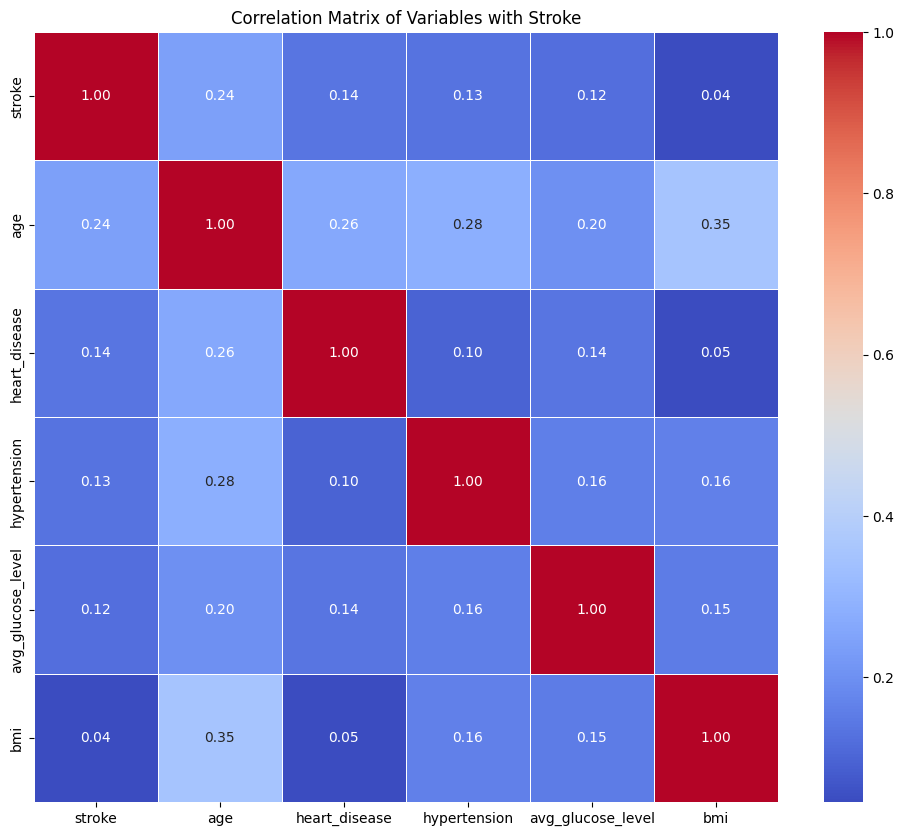

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_with_stroke = df_train.corr()['stroke'].sort_values(ascending=False)
correlation_matrix = df_train[correlation_with_stroke.index].corr()

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

plt.title('Correlation Matrix of Variables with Stroke')

plt.show()

A lot of these variables don't appear to have strong relationships with the 'stroke' variable, because the greatest positive correlation is age = 0.24, while the greatest negative correlation is -0.37.

# Dummy variable creation

Because using dummy variables isn't interpretable for EDA and visualizations, we are creating dummy variables after that step to start the process of testing the methods.

In [8]:
# Creating dummy variables for training set
categorical_columns = ['smoking_status', 'Residence_type', 'gender', 'ever_married', 'work_type']
df_train = pd.get_dummies(df_train, columns=categorical_columns, drop_first=True)

# Check the first few rows of the updated DataFrame
print(df_train.head())


    age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0  36.0             0              0           65.87000  32.2       0   
1  45.0             0              0           68.66000  25.3       0   
2  58.0             0              0          168.63625  30.7       0   
3  61.0             0              0           69.88000  27.1       0   
4  78.0             0              0          103.86000  30.6       0   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                               1                            0   
1                               0                            1   
2                               0                            0   
3                               0                            1   
4                               0                            0   

   smoking_status_smokes  Residence_type_Urban  gender_Male  ever_married_Yes  \
0                      0                     1            1                 1   
1 

In [9]:
# Creating dummy variables for test set
categorical_columns = ['smoking_status', 'Residence_type', 'gender', 'ever_married', 'work_type']
df_test = pd.get_dummies(df_test, columns=categorical_columns, drop_first=True)

# Check the first few rows of the updated DataFrame
print(df_test.head())

    age  hypertension  heart_disease  avg_glucose_level     bmi  stroke  \
0  58.0             1              0             87.960  39.200       0   
1   8.0             0              0            110.890  17.600       0   
2  70.0             0              0             69.040  35.900       0   
3  47.0             0              0            172.225  46.575       0   
4  74.0             1              0            172.225  46.575       0   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                               0                            1   
1                               0                            0   
2                               1                            0   
3                               0                            0   
4                               0                            1   

   smoking_status_smokes  Residence_type_Urban  gender_Male  ever_married_Yes  \
0                      0                     1            1            

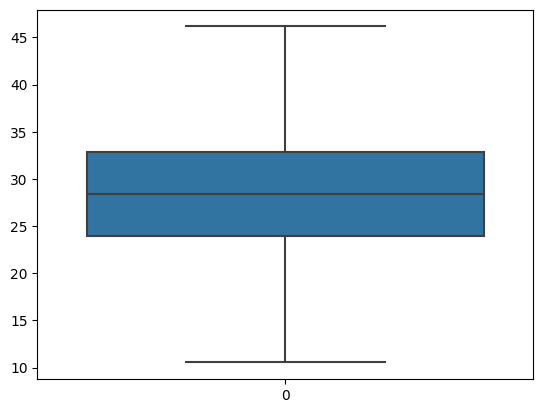

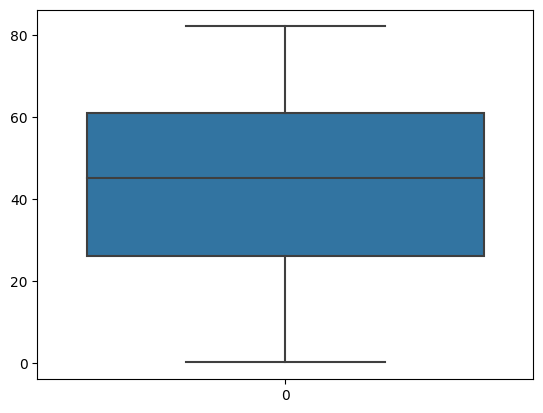

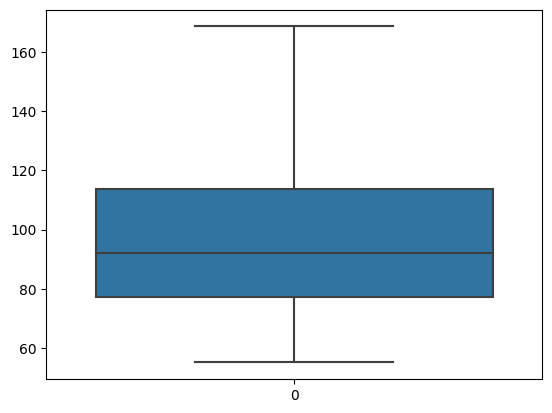

In [ ]:

#Checking if dummy variables are working
sns.boxplot(df_train['bmi'])
plt.show()
sns.boxplot(df_train['age'])
plt.show()
sns.boxplot(df_train['avg_glucose_level'])
plt.show()

# Decision Tree

In [19]:
y_train = df_train['stroke']
X_train = df_train.drop('stroke',axis=1)
y_test = df_test['stroke']
X_test = df_test.drop('stroke',axis=1)

In [20]:

#Because the target variable is binary, using a Decision Tree Regressor is not
# appropriate as proven below with the negative R2 and RMSE scores instead a
# classification algorithm should be used.
depths = range(1, 20)
r2_scores = []
rmse_scores = []

for depth in depths:

    # Construct an appropriate matrix of regressors/features, and fit a tree to the data.
    model_tree = tree.DecisionTreeRegressor(max_depth=depth)
    cart = model_tree.fit(X_train, y_train)



    # Predict and evaluate the model compute the  𝑅2and RMSE on the test set of a variety of depths
    y_pred_tree = model_tree.predict(X_test)
    r2_tree = r2_score(y_test, y_pred_tree)
    rmse_tree = mean_squared_error(y_test, y_pred_tree, squared=False)
    r2_scores.append(r2_tree)
    rmse_scores.append(rmse_tree)


for i, depth in enumerate(depths):
    print(f"Depth: {depth}, R^2: {r2_scores[i]}, RMSE: {rmse_scores[i]}")





Depth: 1, R^2: 0.06852453235547418, RMSE: 0.20809013849847635
Depth: 2, R^2: 0.07934288315582705, RMSE: 0.20687820813400742
Depth: 3, R^2: 0.06961543822071636, RMSE: 0.20796824948224704
Depth: 4, R^2: 0.03920959052134554, RMSE: 0.2113392287768367
Depth: 5, R^2: -0.025390940852872745, RMSE: 0.21832854810038754
Depth: 6, R^2: -0.07327923156394966, RMSE: 0.22336861502394478
Depth: 7, R^2: -0.17140549174717057, RMSE: 0.23335623889834767
Depth: 8, R^2: -0.35802981037857595, RMSE: 0.25125831343498223
Depth: 9, R^2: -0.31450258711905765, RMSE: 0.24719888708749163
Depth: 10, R^2: -0.43431570202614633, RMSE: 0.25821898222256756
Depth: 11, R^2: -0.6211280233956464, RMSE: 0.2745202875961978
Depth: 12, R^2: -0.6720521071989589, RMSE: 0.27879866659646785
Depth: 13, R^2: -0.7764172064635133, RMSE: 0.28736791313823834
Depth: 14, R^2: -0.9712719772272458, RMSE: 0.3027185696604401
Depth: 15, R^2: -0.831589862432168, RMSE: 0.2917963829378874
Depth: 16, R^2: -1.0128936519589669, RMSE: 0.30589769444070175

In [32]:
# classification tree

depths = range(1, 20)
accuracy_scores = []
r2_scores = []
rmse_scores = []

for depth in depths:

    model_tree = tree.DecisionTreeClassifier(max_depth=depth)
    model_tree.fit(X_train, y_train)


    y_pred_tree = model_tree.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred_tree)
    accuracy_scores.append(accuracy)
    r2_tree = r2_score(y_test, y_pred_tree)
    rmse_tree = mean_squared_error(y_test, y_pred_tree, squared=False)
    r2_scores.append(r2_tree)
    rmse_scores.append(rmse_tree)

    cm = confusion_matrix(y_test, y_pred_tree)

for i, depth in enumerate(depths):
    print(f"Depth: {depth}, R^2: {r2_scores[i]}, RMSE: {rmse_scores[i]}")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{cm}\n")



Depth: 1, R^2: -0.05138746145940387, RMSE: 0.22107884414269094
Accuracy: 0.9120234604105572
Confusion Matrix:
[[929  44]
 [ 46   4]]

Depth: 2, R^2: -0.05138746145940387, RMSE: 0.22107884414269094
Accuracy: 0.9120234604105572
Confusion Matrix:
[[929  44]
 [ 46   4]]

Depth: 3, R^2: -0.05138746145940387, RMSE: 0.22107884414269094
Accuracy: 0.9120234604105572
Confusion Matrix:
[[929  44]
 [ 46   4]]

Depth: 4, R^2: -0.05138746145940387, RMSE: 0.22107884414269094
Accuracy: 0.9120234604105572
Confusion Matrix:
[[929  44]
 [ 46   4]]

Depth: 5, R^2: -0.11447070914696811, RMSE: 0.2276146011290056
Accuracy: 0.9120234604105572
Confusion Matrix:
[[929  44]
 [ 46   4]]

Depth: 6, R^2: -0.24063720452209636, RMSE: 0.24015309551703162
Accuracy: 0.9120234604105572
Confusion Matrix:
[[929  44]
 [ 46   4]]

Depth: 7, R^2: -0.3037204522096606, RMSE: 0.24618298195866548
Accuracy: 0.9120234604105572
Confusion Matrix:
[[929  44]
 [ 46   4]]

Depth: 8, R^2: -0.42988694758478907, RMSE: 0.2578200210328065
Ac

[Text(0.5, 0.875, 'age <= 67.5\ngini = 0.093\nsamples = 4086\nvalue = [3887, 199]\nclass = 1'),
 Text(0.25, 0.625, 'age <= 48.5\ngini = 0.046\nsamples = 3402\nvalue = [3322, 80]\nclass = 1'),
 Text(0.125, 0.375, 'age <= 37.5\ngini = 0.012\nsamples = 2256\nvalue = [2242, 14]\nclass = 1'),
 Text(0.0625, 0.125, 'gini = 0.004\nsamples = 1608\nvalue = [1605, 3]\nclass = 1'),
 Text(0.1875, 0.125, 'gini = 0.033\nsamples = 648\nvalue = [637, 11]\nclass = 1'),
 Text(0.375, 0.375, 'avg_glucose_level <= 161.585\ngini = 0.109\nsamples = 1146\nvalue = [1080, 66]\nclass = 1'),
 Text(0.3125, 0.125, 'gini = 0.083\nsamples = 924\nvalue = [884, 40]\nclass = 1'),
 Text(0.4375, 0.125, 'gini = 0.207\nsamples = 222\nvalue = [196, 26]\nclass = 1'),
 Text(0.75, 0.625, 'avg_glucose_level <= 126.84\ngini = 0.287\nsamples = 684\nvalue = [565, 119]\nclass = 1'),
 Text(0.625, 0.375, 'age <= 75.5\ngini = 0.244\nsamples = 457\nvalue = [392, 65]\nclass = 1'),
 Text(0.5625, 0.125, 'gini = 0.16\nsamples = 194\nvalue = 

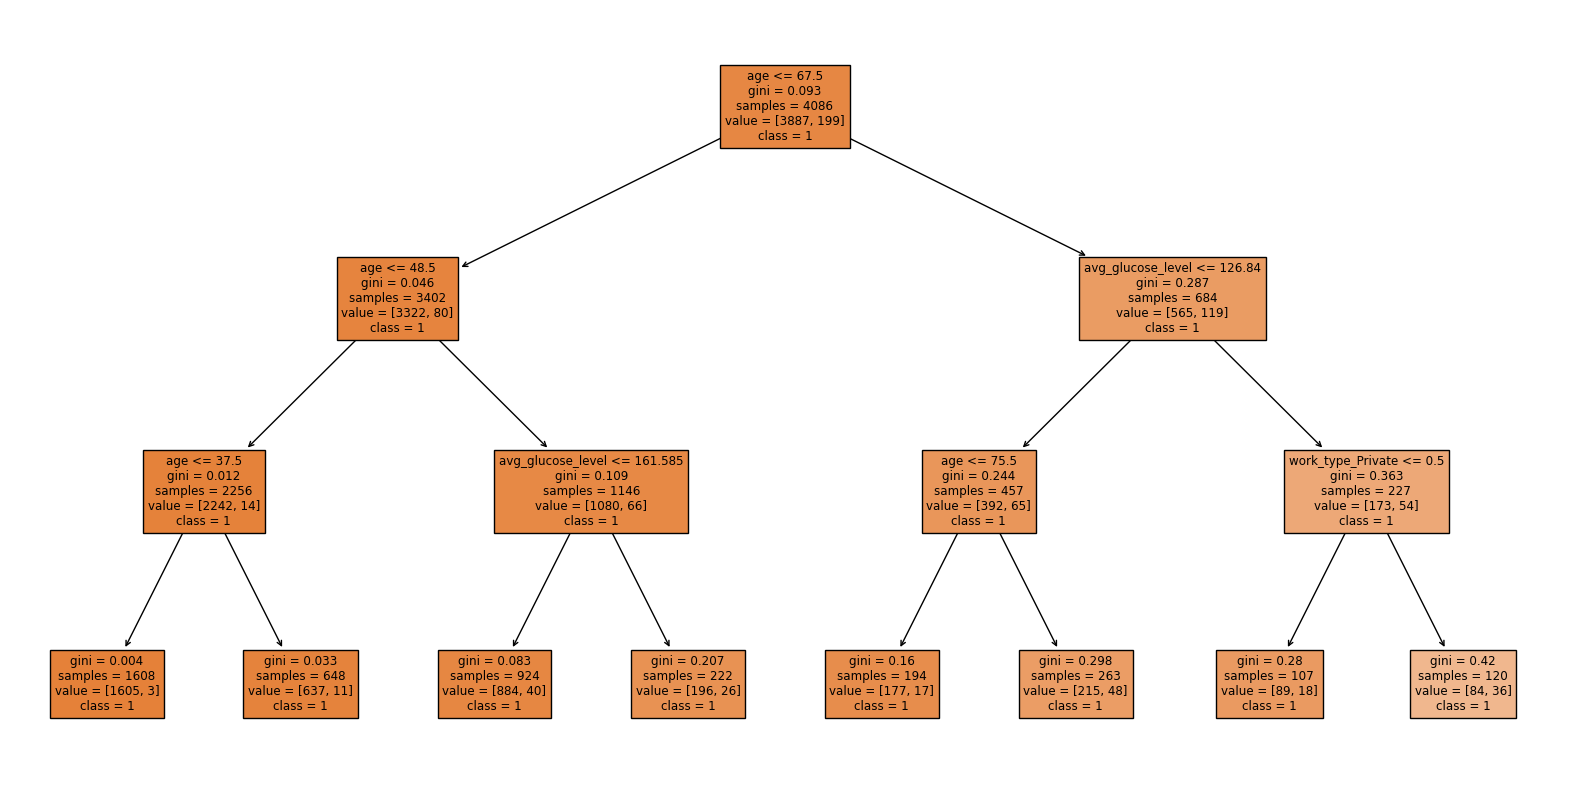

In [30]:
classifier = tree.DecisionTreeClassifier(random_state=42, max_depth=3) # chose max depth 3 for visibility
classifier.fit(X_train, y_train)

# Predictions from the classification tree
y_pred=classifier.predict(X_test)

# Visualize results:
plt.figure(figsize=(20,10))
tree.plot_tree(classifier ,filled=True,feature_names=X_train.columns, class_names=["1","2"])

After concluding that a Decision Tree Regressor is not suitable for a binary outcome due to negative R^2 and RMSE scores, we utilized a Decision Tree Classifier with a maximum depth of 3. The decision tree's visualization highlighted the following rules for classification:
The most significant variables at this depth are age, average glucose level, and work type.
Individuals over 67.5 years and with an average glucose level greater than 126.84 and who work primarily in the private sector are most at risk for stroke as seen by the highest gini value for that classification.
Individuals less than 37.5 years old are least likely to be categorized as having a stroke.

The tree indicates that age is the most determining feature followed by average glucose level, then private work type. The performance metrics of the classification model, reflected by the confusion matrix, show a substantial imbalance. While the model has a high overall accuracy of 95.17%, this figure is primarily due to its ability to predict the more prevalent non-stroke class correctly. This is evidenced by the 973 correct predictions of non-stroke cases (true negatives) and the complete absence of stroke predictions, resulting in 50 stroke cases (false negatives) that the model failed to identify. There were no instances of true positive predictions for stroke, indicating that the model has a significant limitation in identifying actual stroke events. In a health context, this is especially harmful as false negatives could result in not getting the proper treatment and worsening conditions. The RMSE for each depth of this tree ranged from 0.22 to 0.3. As seen further in the results, this is the highest RMSE of all three methods and indicates that this method is not suitable for predicting the likelihood of stroke.


In [33]:
# Compute confusion matrix
tab = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
acc = (tab.iloc[0, 0] + tab.get(1, {}).get(1, 0)) / tab.to_numpy().sum()
print(acc)
print(tab)
accuracy_method_1 = tab.iloc[0, 0] / tab.iloc[0].sum() if 0 in tab else 0
accuracy_method_2 = tab.get(1, {}).get(1, 0) / tab.iloc[1].sum() if 1 in tab else 0


0.9511241446725318
Predicted    0
Actual        
0          973
1           50


# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
# Bit of data cleaning before I proceed
dfTr = df_train
dfTe = df_test
# First I'll just do numerical values
numerics = ['age','avg_glucose_level','bmi']
X_num = dfTr.loc[:,numerics]
y = dfTr['stroke']
reg = LinearRegression().fit(X_num,y)
print(reg.score(X_num, y)) # R-squared
X_num_test = dfTe.loc[:,numerics]
X_num_predict = reg.predict(X_num_test)
y_test = dfTe['stroke']
from sklearn.metrics import mean_squared_error as mse
import math
print(math.sqrt(mse(y_test, X_num_predict))) # RMSE

# Then I'll try and incorporate all the variables
allvars = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes',
       'Residence_type_Urban', 'gender_Male', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children']
X_all = dfTr.loc[:,allvars]
y = dfTr['stroke']
reg = LinearRegression().fit(X_all, y)
print(reg.score(X_all,y)) # R-squared of 0.08, little better
X_all_test = dfTe.loc[:,allvars]
X_all_predict = reg.predict(X_all_test)
y_test = dfTe['stroke']
print(math.sqrt(mse(y_test, X_all_predict))) # RMSE roughly the same, 0.2067

0.0663549633394519
0.2078679318645726
0.08417775915375991
0.20670024019739772


Due to the response variable (stroke) being a dummy variable, we didn’t use linear regression models very extensively here. However, we did experiment with a couple of models: one in which only the numeric variables (age, avg_glucose_lvl, bmi) were considered, and one in which all the variables were used. Both of these models did not appear to be very predictive at first glance, given that the R-squared values for both were below 0.10 (the former being slightly lower than the latter at 0.6 and 0.8 respectively). The RMSE for the model with just numerical variables was 0.207. The RMSE for the model for all variables was 0.206. This means that out of these two models, we would prefer the model with all variables, as it has the lowest RMSE value and highest R-squared value. What is interesting here is that the RMSE is actually quite similar to our K-nearest neighbors model - at 0.2, it implies that the average error was within 20% of any given stroke value.


# KNN

In [ ]:
#first, just going to do a quick-recheck to make sure the data is ready to go
#lets make sure all columns are present in both datasets


print("checking all columns: ")
wrong_columns = 0
for column in df_test.columns:
    if column not in df_train.columns:
        print(f"The column '{column}' is not present in both dataframes.")
        wrong_columns += 1

if wrong_columns == 0:
  print("All columns are the same, we're good to go", '\n')
elif wrong_columns > 0:
    print("we have a problem: testing and training columns do not match")

#now lets check the data, and if needed, we'll normalize for kNN
numerical_columns = ['age', 'avg_glucose_level', 'bmi']
print(df_train[numerical_columns].head())
print(df_test[numerical_columns].head())

#looks like none of it has been normalized. For this knn section, I'd like to normalize the data,
#otherwise our distance metrics will be all messed up, particularly because of the hot encoded variables

checking all columns: 
All columns are the same, we're good to go 

    age  avg_glucose_level   bmi
0  36.0           65.87000  32.2
1  45.0           68.66000  25.3
2  58.0          168.63625  30.7
3  61.0           69.88000  27.1
4  78.0          103.86000  30.6
    age  avg_glucose_level     bmi
0  58.0             87.960  39.200
1   8.0            110.890  17.600
2  70.0             69.040  35.900
3  47.0            172.225  46.575
4  74.0            172.225  46.575


In [ ]:
#maxmin normalization for knn:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)


def pn(x):
    print(x,'\n')
    return

df_train_encoded = df_train.copy()
df_test_encoded = df_test.copy()
#max min the numerical columns
numerical_columns = ['age', 'avg_glucose_level', 'bmi']
df_train_encoded[numerical_columns] = df_train_encoded[numerical_columns].apply(maxmin)
df_test_encoded[numerical_columns] = df_test_encoded[numerical_columns].apply(maxmin)

# Check the first few rows after normalization
pn("Maxmin training data:")
pn(df_train_encoded[numerical_columns].head())
#yay it worked!
pn("Maxmin testing data: ")
pn(df_test_encoded[numerical_columns].head())
#ok, both sets have been successfully normalized. Now we are ready to actually to kNN.



Maxmin training data: 

        age  avg_glucose_level       bmi
0  0.438477           0.094700  0.608146
1  0.548340           0.119278  0.414326
2  0.707031           1.000000  0.566011
3  0.743652           0.130025  0.464888
4  0.951172           0.429366  0.563202 

Maxmin testing data:  

        age  avg_glucose_level       bmi
0  0.706745           0.279632  0.789736
1  0.095797           0.475657  0.173913
2  0.853372           0.117888  0.695652
3  0.572336           1.000000  1.000000
4  0.902248           1.000000  1.000000 



51 



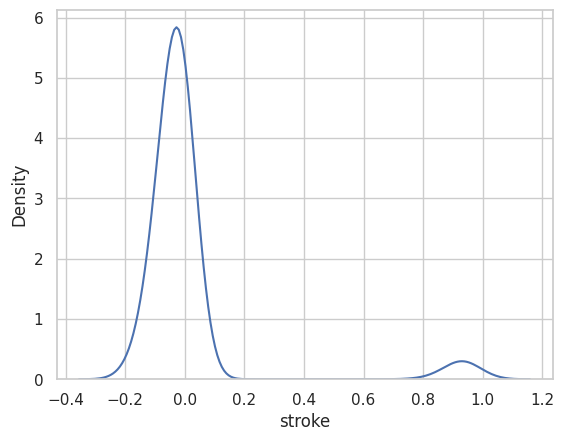

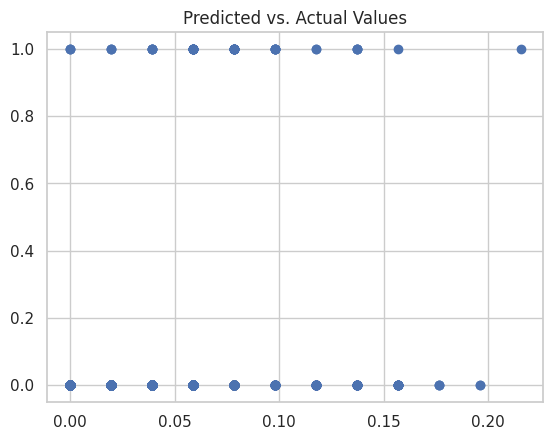

R2: 0.037308058829968904
RMSE:  0.21154832766265794


In [ ]:
#kNN time:
#specify our x and y splits using the pre-split data
#most of what is below is a slightly modified version of our class notes
y_train = df_train_encoded['stroke']
y_test = df_test_encoded['stroke']

X_train_knn = df_train_encoded.drop('stroke', axis = 1)
X_test_knn = df_test_encoded.drop('stroke', axis = 1)

TSS = np.sum( (y_test - y_train.mean())**2 )
N_test = len(y_test)

#Now lets find the optimal k
k_bar = 70
k_grid = np.arange(1,k_bar)
SSE_train = np.zeros(k_bar)
SSE_test = np.zeros(k_bar)
for k in range(k_bar):
    model = kNNRegression(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train_knn,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test_knn) # Predict values for test set
    SSE_test[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
    y_hat = fitted_model.predict(X_train_knn) # Predict values for training set
    SSE_train[k] = np.sum( (y_train-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE_test) # Lowest recorded SSE
min_index = np.where(SSE_test==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index][0] # Find the optimal value of k
      #note: added the [0] here b/c this was being returned as an 0-index array: [k-star] instead of the integer itself, k-star
pn(k_star)

## Fit optimal model:
model = KNeighborsRegressor(n_neighbors=max(3,k_star))
knn_star = model.fit(X_train_knn,y_train)
y_hat_knn = knn_star.predict(X_test_knn)
residuals_knn = y_test - y_hat_knn


## Residual plot:
sns.kdeplot(residuals_knn)
plt.show()

## True versus predicted plot:
plt.scatter(x=y_hat_knn,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show()

## Metrics:
SSE_knn = np.sum( (y_test-y_hat_knn)**2 )
MSE_knn = SSE_knn/N_test
RMSE_knn = (SSE_knn/N_test)**(1/2)
R2_knn = 1 - SSE_knn/TSS

print("R2:", R2_knn)
print("RMSE: ", RMSE_knn)




The low R^2 indicates that there are likely very many other variables, not included in our regression/part of the error term, which contribute to stroke occurrences outside of just the variables we included. This is not surprising, as someone's health is a complex function of many, many factors (diet, exercise, location, genetic predispositions, etc). The RMSE is approximately 0.211, indicating that the model's predictions are on average within 20% of the actual stroke values in our maxmin normalized scale. Given that kNN is a non-parametric, instance-based learning method, this level of accuracy suggests that our choice of features, the number of neighbors (k), and our distance metric are reasonably well-tuned for capturing the underlying patterns in the data. We did windsorize the data, so it is likely not outliers that are preventing the model from doing a better job. It is also possible that there are irrelevant features we included which need to be revised to improve the accuracy of the model. Lastly, perhaps there is a better method of dealing with our missing values, particularly in the BMI category (we replace missings with the mean), which if handled better would increase the performance of our model.
